(100, 4)
(100, 1)
(4, 1)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1.]]
训练集的准确度为： 100.0 %
迭代的次数: 0 ， 误差值： 0.676901
迭代的次数: 10 ， 误差值： 0.399650
迭代的次数: 20 ， 误差值： 0.285963
迭代的次数: 30 ， 误差值： 0.222117
迭代的次数: 40 ， 误差值： 0.181422
迭代的次数: 50 ， 误差值： 0.153439
迭代的次数: 60 ， 误差值： 0.133107
迭代的次数: 70 ， 误差值： 0.117702
迭代的次数: 80 ， 误差值： 0.105642
迭代的次数: 90 ， 误差值： 0.095952
迭代的次数: 100 ， 误差值： 0.087998
迭代的次数: 110 ， 误差值： 0.081354
迭代的次数: 120 ， 误差值： 0.075721
迭代的次数: 130 ， 误差值： 0.070884
迭代的次数: 140 ， 误差值： 0.066687
迭代的次数: 150 ， 误差值： 0.063009
迭代的次数: 160 ， 误差值： 0.059759
迭代的次数: 170 ， 误差值： 0.056868
迭代的次数: 180 ， 误差值： 0.054277
迭代的次数: 190 ， 误差值： 0.051943
迭代的次数: 200 ， 误差值： 0.049829
迭代的次数: 210 ， 误差值： 0.047905
迭代的次数: 220 ， 误差值： 0.046146
迭代的次数: 230 ， 误差值： 0.044532
迭代的次数: 2

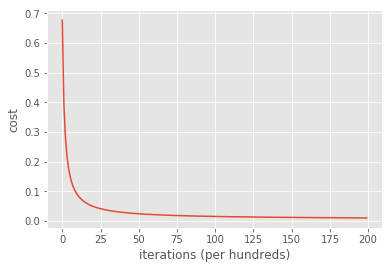

In [23]:
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split
import datetime
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

def loadDataSet():
    dataMatrix = []
    datalabel = []
    plt.style.use('ggplot')  #使用自带的样式进行美化
    iris = load_iris()       #获取数据
    data = iris.data         
    target = iris.target
    X = data[0:100]          #选择前两类各50组数据
    Y = target[0:100]
    datalabel = np.mat(Y)    #使数据变成标准矩阵形式
    datalabel=np.transpose(datalabel)  #进行转置
    dataMatrix = np.mat(X)
    minmax_x_train = MinMaxScaler()
    x_train_std = minmax_x_train.fit_transform(dataMatrix)  #使数据标准化
    dataMatrix = np.mat(x_train_std)
    return dataMatrix,datalabel

def sigmoid(X):
    return 1.0/(1+np.exp(-X))   #sigmoid函数形式

def graAscent(dataMatrix,matLabel,num): #梯度下降
    m,n=np.shape(dataMatrix)
    w=np.ones((n,1))      #将w初始化为1
    alpha=0.01            #设置学习速率为alpha
    for i in range(num):   #num为迭代次数
        error=sigmoid(dataMatrix*w)-matLabel   
        w=w-alpha*dataMatrix.transpose()*error
    return w

def predict(w,X):         #预测函数
    m = X.shape[0]        #取列数
    Y_prediction = np.zeros((m,1))
    #w = w.ones(X.shape[0],1)
    A = sigmoid(np.dot(X,w))
    for i in range(A.shape[0]):
        if A[i,0]>0.5:
            Y_prediction[i ,0]=1
        else:
            Y_prediction[i ,0]=0
    assert(Y_prediction.shape == (m,1))
    return Y_prediction

def loss(X,Y,num,print_cost=False):   #损失函数
   #costs=loss(weight,dataMatrix,matLabel, num)
    m, n = np.shape(dataMatrix)
    w = np.ones((n, 1))
    alpha = 0.01
    costs = []
    print_cost=0
    for i in range(num):
        # 记录损失
        error = sigmoid(dataMatrix * w) - matLabel      #损失误差
        w = w - alpha * dataMatrix.transpose() * error  #更新w
        A = sigmoid(np.dot(X, w))
        w = np.array(w)
        A = np.array(A)
        Y= np.array(Y)
        cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))
        if i % 10== 0:
            costs.append(cost)
            print("迭代的次数: %i ， 误差值： %f" % (i, cost))
    return costs

if __name__ == '__main__':
    dataMatrix,matLabel=loadDataSet()
    print(dataMatrix.shape)   #打印训练数据维度
    print(matLabel.shape)     #打印训练目标维度
    num = 2000                #设置迭代次数
    #weight=graAscent(dataMatrix,matLabel)
    weight= graAscent(dataMatrix,matLabel,num)  #计算权值
    print(weight.shape)       #打印权值矩阵维度
    y=predict(weight,dataMatrix)  #训练数据的预测结果
    print(y.T)
    print("训练集的准确度为：", format(100 - np.mean(np.abs(y - matLabel) * 100)), "%")
    costs = loss(dataMatrix, matLabel, num)  
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.show()
